In [4]:
conda activate tf


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow-gpu


Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\shiri\AppData\Local\Temp\pip-install-5_k3oews\tensorflow-gpu_c4f5f8b6309e40aea9401ea788ac1418\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not

In [1]:
pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.8.0.74-cp37-abi3-win_amd64.whl (44.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,Input
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import tensorflow_hub as hub

ModuleNotFoundError: No module named 'tensorflow_hub'

In [117]:
img_arry = cv2.imread("train/0/fer0000022.png")

In [118]:
img_arry.shape

(48, 48, 3)

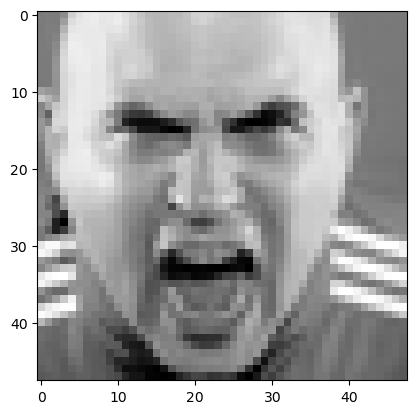

In [119]:
plt.imshow(img_arry)

In [120]:
# finding no. of images in each class 
d = {}
classes = ['0','1','2','3','4','5','6','7']
for i,item in enumerate(classes):
    path = os.path.join('train/',item)
    d[i] = len(os.listdir(path))


In [121]:
print("No.of images in each class are ",d)

No.of images in each class are  {0: 2466, 1: 165, 2: 191, 3: 652, 4: 7528, 5: 10308, 6: 3514, 7: 3562}


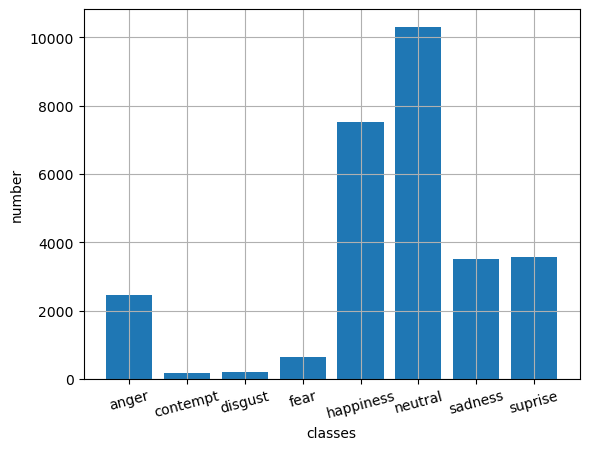

In [122]:
class_category = list(d.keys()) 
quantity_class = list(d.values())

plt.bar(class_category, quantity_class)

plt.xticks(ticks = class_category,labels=["anger","contempt","disgust","fear","happiness","neutral","sadness","suprise"],rotation = 15)

plt.grid()
plt.xlabel("classes")
plt.ylabel("number")
plt.show()

# AlexNET Not that great 

In [123]:
# def Alexnet(input_shape, num_of_classes):   
#     model = keras.Sequential()
#     model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
#                             strides=(4, 4), activation="relu", 
#                             input_shape=input_shape))

#     model.add(layers.BatchNormalization())

#     model.add(layers.MaxPool2D(pool_size=(3, 3)))

#     model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
#                             strides=(1, 1), activation="relu", 
#                             padding="same"))

#     model.add(layers.BatchNormalization())

#     model.add(layers.MaxPool2D(pool_size=(3, 3)))

#     model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
#                             strides=(1, 1), activation="relu", 
#                             padding="same"))

#     model.add(layers.BatchNormalization())

#     model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
#                             strides=(1, 1), activation="relu", 
#                             padding="same"))

#     model.add(layers.BatchNormalization())

#     model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
#                             strides=(1, 1), activation="relu", 
#                             padding="same"))

#     model.add(layers.BatchNormalization())

#     model.add(layers.MaxPool2D(pool_size=(3,3)))

#     model.add(layers.Flatten())

#     model.add(layers.Dense(4096, activation="relu"))

#     model.add(layers.Dropout(0.5))

#     model.add(layers.Dense(num_of_classes, activation="softmax"))
    
#     return model



In [144]:
    # from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
    # from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, BatchNormalization, ReLU, Dropout

    # def mobilenetv2(input_shape, num_of_classes, freeze_layers=True):
    #     # Load the MobileNetV2 model without the top classification layers
    #     base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    #     # Freeze layers in the base model
    #     if freeze_layers:
    #         for layer in base_model.layers:
    #             layer.trainable = False

    #     # Add a new classifier on top of the base model
    #     x = GlobalAveragePooling2D()(base_model.output)
    #     x = Dense(1024)(x)
    #     x = BatchNormalization()(x)
    #     x = ReLU()(x)
    #     x = Dropout(0.5)(x)
    #     output = Dense(num_of_classes, activation='softmax')(x)

    #     # Create the final model
    #     model = Model(inputs=base_model.input, outputs=output)

    #     return model

In [145]:
# model = mobilenetv2((96,96,3),8)
# model.compile(loss='sparse_categorical_crossentropy', 
#                   optimizer=tf.optimizers.SGD(learning_rate=0.001), 
#                   metrics=['accuracy'])
# model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 48, 48, 32)           864       ['input_12[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 48, 48, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           

 rmalization)                                                                                     
                                                                                                  
 block_3_expand_relu (ReLU)  (None, 24, 24, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 25, 25, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 12, 12, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_d

 seConv2D)                                                                                        
                                                                                                  
 block_6_depthwise_BN (Batc  (None, 6, 6, 192)            768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 6, 6, 192)            0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 6, 6, 64)             12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
          

 block_9_project_BN (BatchN  (None, 6, 6, 64)             256       ['block_9_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_9_add (Add)           (None, 6, 6, 64)             0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 6, 6, 384)            24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 6, 6, 384)            1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
          

 block_13_expand_BN (BatchN  (None, 6, 6, 576)            2304      ['block_13_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_13_expand_relu (ReLU  (None, 6, 6, 576)            0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 7, 7, 576)            0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 3, 3, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D

                                                                                                  
 block_16_depthwise (Depthw  (None, 3, 3, 960)            8640      ['block_16_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 3, 3, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 3, 3, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_

In [146]:
# batch_size =32
# img_width,img_height = 224,224

# emotions_with_augmentation = [0,1,2,3,6,7]

# augumentation_params = {
#      "rescale" : 1.0/255,
#      "horizontal_flip" : True,
#      "zoom_range":0.2,
#      "rotation_range":15,
#     "shear_range":0.2
#  }
    
    

In [147]:
# train_data_gen = ImageDataGenerator(**augumentation_params)

# test_data_gen = ImageDataGenerator(rescale=1.0/255)

In [151]:
# train_generator = train_data_gen.flow_from_directory(
#     "train",
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode="sparse",
#     color_mode="rgb",
#     shuffle=True
# )

# validation_generator = test_data_gen.flow_from_directory(
#     "test",
#     batch_size=batch_size,
#     class_mode='sparse',target_size=(img_width,img_height),
# )


Found 28386 images belonging to 8 classes.
Found 7099 images belonging to 8 classes.


In [155]:
# # Early stopping criteria 
# early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
# # Calculate class weights
# class_weights = compute_class_weight('balanced', classes = np.unique(train_generator.classes), y =train_generator.classes)
# class_weights_dict = {i: class_weights[i] for i in range(len(np.unique(train_generator.classes)))}

In [156]:
# model.fit(train_generator,
#                     steps_per_epoch=train_generator.samples // batch_size,
#                     epochs=25,
#                     validation_data=validation_generator,
#                     validation_steps=validation_generator.samples // batch_size,
#                     class_weight=class_weights_dict,
#                    callbacks = [early_stopping],verbose=1)

Epoch 1/25
887/887 [==============================] - 793s 894ms/step - loss: 1.7916 - accuracy: 0.3192 - val_loss: 1.6558 - val_accuracy: 0.3826
Epoch 2/25
887/887 [==============================] - 854s 962ms/step - loss: 1.7335 - accuracy: 0.3326 - val_loss: 1.5292 - val_accuracy: 0.4367
Epoch 3/25
887/887 [==============================] - 824s 929ms/step - loss: 1.6775 - accuracy: 0.3400 - val_loss: 1.4502 - val_accuracy: 0.4717
Epoch 4/25
887/887 [==============================] - 862s 972ms/step - loss: 1.6389 - accuracy: 0.3536 - val_loss: 1.4793 - val_accuracy: 0.4471
Epoch 5/25
887/887 [==============================] - 902s 1s/step - loss: 1.6314 - accuracy: 0.3541 - val_loss: 1.5050 - val_accuracy: 0.4225
Epoch 6/25
887/887 [==============================] - 988s 1s/step - loss: 1.5962 - accuracy: 0.3654 - val_loss: 1.5086 - val_accuracy: 0.4364
Epoch 7/25
887/887 [==============================] - 971s 1s/step - loss: 1.5899 - accuracy: 0.3668 - val_loss: 1.5615 - val_accu

# MobilenetV2

In [157]:
model1 = MobileNetV2() # Pretrained Model

14536120/14536120 [==============================] - 0s 0us/step


In [162]:
model1.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_13[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [159]:
#returns the input tensor of the first layer in the model1 neural network model
base_input = model1.layers[0].input

In [160]:
#
base_output = model1.layers[-2].output

In [165]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(8,activation='softmax')(final_output)

In [167]:
# final_output
final_output

# new model
new_model = keras.Model(inputs=base_input,outputs=final_output)

In [168]:
new_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_13[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [169]:
new_model.compile(loss='sparse_categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [170]:
batch_size =32
img_width,img_height = 224,224

emotions_with_augmentation = [0,1,2,3,6,7]

augumentation_params = {
     "rescale" : 1.0/255,
     "horizontal_flip" : True,
     "zoom_range":0.2,
     "rotation_range":15,
    "shear_range":0.2
 }
    
    

In [171]:
train_data_gen = ImageDataGenerator(**augumentation_params)

test_data_gen = ImageDataGenerator(rescale=1.0/255)

In [172]:
train_generator = train_data_gen.flow_from_directory(
    "train",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="sparse",
    color_mode="rgb",
    shuffle=True
)

validation_generator = test_data_gen.flow_from_directory(
    "test",
    batch_size=batch_size,
    class_mode='sparse',target_size=(img_width,img_height),
    shuffle=True
)


Found 28386 images belonging to 8 classes.
Found 7099 images belonging to 8 classes.


In [173]:
# Early stopping criteria 
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
# # Calculate class weights
# class_weights = compute_class_weight('balanced', classes = np.unique(train_generator.classes), y =train_generator.classes)
# class_weights_dict = {i: class_weights[i] for i in range(len(np.unique(train_generator.classes)))}

In [175]:
new_model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=25,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size,
                    #class_weight=class_weights_dict,
                   callbacks = [early_stopping],verbose=1)

Epoch 1/25
887/887 [==============================] - 3488s 4s/step - loss: 0.8796 - accuracy: 0.6969 - val_loss: 2.6798 - val_accuracy: 0.5349
Epoch 2/25
887/887 [==============================] - 3433s 4s/step - loss: 0.7185 - accuracy: 0.7498 - val_loss: 2.8281 - val_accuracy: 0.3422
Epoch 3/25
887/887 [==============================] - 3379s 4s/step - loss: 0.6609 - accuracy: 0.7698 - val_loss: 1.8251 - val_accuracy: 0.5727
Epoch 4/25
887/887 [==============================] - 3393s 4s/step - loss: 0.6214 - accuracy: 0.7809 - val_loss: 1.7961 - val_accuracy: 0.5284
Epoch 5/25
887/887 [==============================] - 3356s 4s/step - loss: 0.5947 - accuracy: 0.7852 - val_loss: 1.8317 - val_accuracy: 0.5650
Epoch 6/25
887/887 [==============================] - 3420s 4s/step - loss: 0.5704 - accuracy: 0.7954 - val_loss: 0.9734 - val_accuracy: 0.6787
Epoch 7/25
887/887 [==============================] - 3166s 4s/step - loss: 0.5442 - accuracy: 0.8077 - val_loss: 1.0805 - val_accuracy:

# Saving the model

In [176]:
new_model.save('emotion_detector.h5')

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [177]:
new_model.save('emotion_detector.keras')

# Importing model and integration using opencv

In [9]:
import cv2
import numpy as np
import tensorflow as tf

# Set the GPU device for TensorFlow
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

path = 'haarcascade_frontalface_default.xml'

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# setting the recatangle background to white
rectangle_bgr = (255,255,255)

# making a black image
img = np.zeros((500,500))

# set some text
text = " text in box"

# adjusting width and height of the test box
(text_width, text_height) = cv2.getTextSize(text,font, fontScale=font_scale,thickness=1)[0]

# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

# make the coodrinates of the box with a small padding of twoo pixels
box_coords = ((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y), font, fontScale=font_scale,color=(0,0,0),thickness=1)

cap = cv2.VideoCapture(1)
# check if the webcam is opened correctly

if not cap.isOpened():
        cap = cv2.VideoCapture(0)
if not cap.isOpened():
        raise IOError("Cannot open Webcam!!")

# Define the positions of emotion icons at the bottom right corner
icon_x_offset = 20
icon_y_offset = 20
icon_spacing = 10

# Load the emotion icons
# emotions = ['angry', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
# emotion_icons = {}
# for emotion in emotions:
#     icon = cv2.imread(f'{emotion}.png', cv2.IMREAD_UNCHANGED)
#     if icon is None:
#         print(f"Error: Failed to load '{emotion}.png'")
#     emotion_icons[emotion] = cv2.resize(icon, (50,50))
# icon_y = icon_y_offset
#=======================================================

new_model = tf.keras.models.load_model('emotion_detector.h5') # defining the model
# Define the prediction function with @tf.function
@tf.function
def predict_emotion(image):
    return new_model(image,training=False)

#==============================================

cap.set(3, 640)  # Set the width to 640 pixels
cap.set(4, 480)  # Set the height to 480 pixels
while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray,1.1,4)

    for x,y,w,h in faces:
            roi_gray = gray[y:y+h,x:x+w]
            roi_color= frame[y:y+h,x:x+w]
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
            facess = faceCascade.detectMultiScale(roi_gray)
            if len(facess) == 0:
                    print("Face not Detected")
            else:
                for(ex,ey,ew,eh) in facess:
                        face_roi = roi_color[ey:ey+eh,ex:ex+ew] # crp the face

    final_image = cv2.resize(face_roi,(224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image = final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX

    

    Predictions = predict_emotion(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(Predictions)==0):
        status = 'Angry'

        x1,y1,w1,h1 = 0,0,175,75
           
        # draw black background rectagle 

        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)

        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,0,255))
        
        # icon = emotion_icons['angry']
        # icon_x = frame.shape[1] - icon.shape[1] - icon_x_offset
        # frame[icon_y:icon_y + icon.shape[0], icon_x:icon_x + icon.shape[1]] = icon
        # icon_y += icon.shape[0] + icon_spacing

    elif (np.argmax(Predictions)==1):
        status = 'contempt'

        x1,y1,w1,h1 = 0,0,175,75
           
        # draw black background rectagle 

        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)

        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,0,255))
        
        # icon = emotion_icons['contempt']
        # icon_x = frame.shape[1] - icon.shape[1] - icon_x_offset
        # frame[icon_y:icon_y + icon.shape[0], icon_x:icon_x + icon.shape[1]] = icon
        # icon_y += icon.shape[0] + icon_spacing

    elif (np.argmax(Predictions)==2):
        status = 'disgust'

        x1,y1,w1,h1 = 0,0,175,75
           
        # draw black background rectagle 

        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)

        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,0,255))
        
        # icon = emotion_icons['disgust']
        # icon_x = frame.shape[1] - icon.shape[1] - icon_x_offset
        # frame[icon_y:icon_y + icon.shape[0], icon_x:icon_x + icon.shape[1]] = icon
        # icon_y += icon.shape[0] + icon_spacing

    elif (np.argmax(Predictions)==3):
        status = 'fear'

        x1,y1,w1,h1 = 0,0,175,75
           
        # draw black background rectagle 

        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)

        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,0,255))
        
        # icon = emotion_icons['fear']
        # icon_x = frame.shape[1] - icon.shape[1] - icon_x_offset
        # frame[icon_y:icon_y + icon.shape[0], icon_x:icon_x + icon.shape[1]] = icon
        # icon_y += icon.shape[0] + icon_spacing

    elif (np.argmax(Predictions)==4):
        status = 'happiness'

        x1,y1,w1,h1 = 0,0,175,75
           
        # draw black background rectagle 

        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)

        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,0,255))
        
        # icon = emotion_icons['happiness']
        # icon_x = frame.shape[1] - icon.shape[1] - icon_x_offset
        # frame[icon_y:icon_y + icon.shape[0], icon_x:icon_x + icon.shape[1]] = icon
        # icon_y += icon.shape[0] + icon_spacing

    elif (np.argmax(Predictions)==5):
        status = 'neutral'

        x1,y1,w1,h1 = 0,0,175,75
           
        # draw black background rectagle 

        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)

        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,0,255))
        
        # icon = emotion_icons['neutral']
        # icon_x = frame.shape[1] - icon.shape[1] - icon_x_offset
        # frame[icon_y:icon_y + icon.shape[0], icon_x:icon_x + icon.shape[1]] = icon
        # icon_y += icon.shape[0] + icon_spacing

    elif (np.argmax(Predictions)==6):
        status = 'Sadness'

        x1,y1,w1,h1 = 0,0,175,75
           
        # draw black background rectagle 

        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)

        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,0,255))
        
        # icon = emotion_icons['sadness']
        # icon_x = frame.shape[1] - icon.shape[1] - icon_x_offset
        # frame[icon_y:icon_y + icon.shape[0], icon_x:icon_x + icon.shape[1]] = icon
        # icon_y += icon.shape[0] + icon_spacing

    else:
        status = 'suprise'

        x1,y1,w1,h1 = 0,0,175,75
           
        # draw black background rectagle 

        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)

        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,0,255))
        
        # icon = emotion_icons['suprise']
        # icon_x = frame.shape[1] - icon.shape[1] - icon_x_offset
        # frame[icon_y:icon_y + icon.shape[0], icon_x:icon_x + icon.shape[1]] = icon
        # icon_y += icon.shape[0] + icon_spacing
        
        
    cv2.imshow("Face Emotion Recogniton",frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected


KeyboardInterrupt: 